In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [136]:
df=pd.read_csv('/content/data.csv')
df

Age  Gender    Education  ...  Residence_Type  Marital_Status  Creditworthiness
0       56  Female       Master  ...          Rented          Single                 1
1       69  Female  High School  ...       Mortgaged         Married                 1
2       46  Female       Master  ...           Owned          Single                 1
3       32    Male  High School  ...           Owned          Single                 1
4       60    Male          PhD  ...          Rented         Married                 0
...    ...     ...          ...  ...             ...             ...               ...
11995   69    Male     Bachelor  ...           Owned          Single                 0
11996   20    Male  High School  ...          Rented          Single                 1
11997   66    Male  High School  ...           Owned         Married                 1
11998   61  Female          PhD  ...       Mortgaged        Divorced                 1
11999   49    Male  High School  ...          Rented        Divorced                 0

[12000 rows x 14 columns]

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                12000 non-null  int64 
 1   Gender             12000 non-null  object
 2   Education          12000 non-null  object
 3   Income             12000 non-null  int64 
 4   Debt               12000 non-null  int64 
 5   Credit_Score       12000 non-null  int64 
 6   Loan_Amount        12000 non-null  int64 
 7   Loan_Term          12000 non-null  int64 
 8   Num_Credit_Cards   12000 non-null  int64 
 9   Payment_History    12000 non-null  object
 10  Employment_Status  12000 non-null  object
 11  Residence_Type     12000 non-null  object
 12  Marital_Status     12000 non-null  object
 13  Creditworthiness   12000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.3+ MB


In [138]:
df.describe(include='all')

Age  Gender  ... Marital_Status  Creditworthiness
count   12000.000000   12000  ...          12000      12000.000000
unique           NaN       2  ...              3               NaN
top              NaN  Female  ...        Married               NaN
freq             NaN    6012  ...           4012               NaN
mean       43.489250     NaN  ...            NaN          0.702583
std        14.908982     NaN  ...            NaN          0.457140
min        18.000000     NaN  ...            NaN          0.000000
25%        31.000000     NaN  ...            NaN          0.000000
50%        43.000000     NaN  ...            NaN          1.000000
75%        56.000000     NaN  ...            NaN          1.000000
max        69.000000     NaN  ...            NaN          1.000000

[11 rows x 14 columns]

In [139]:
df.duplicated().sum()

np.int64(0)

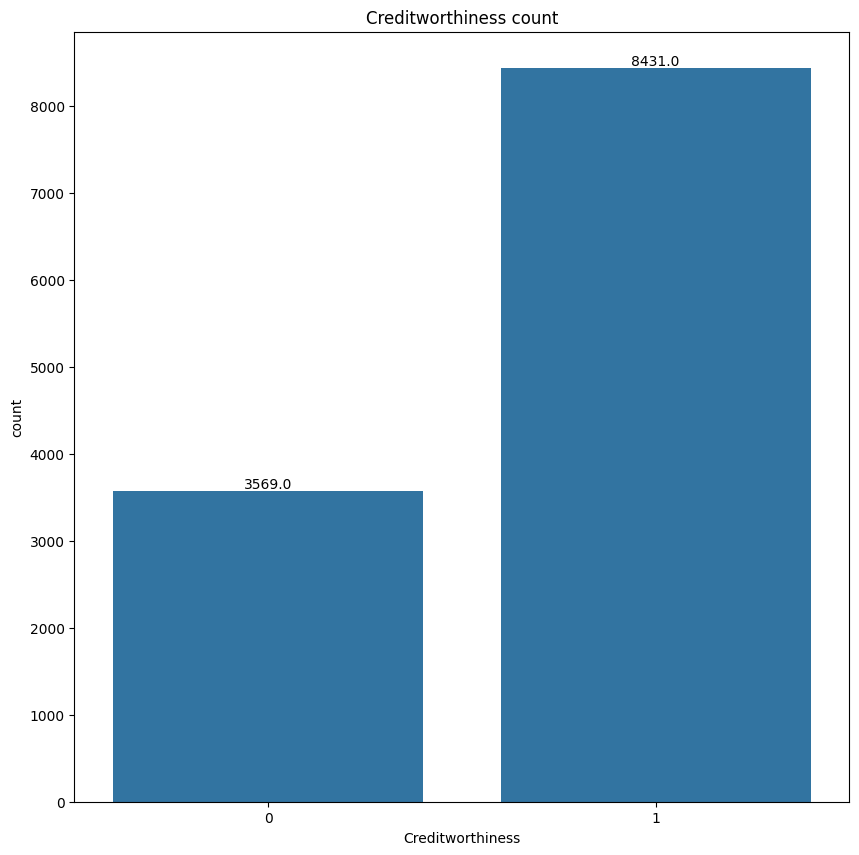

In [140]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x='Creditworthiness', data=df)
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Creditworthiness count')
plt.show()

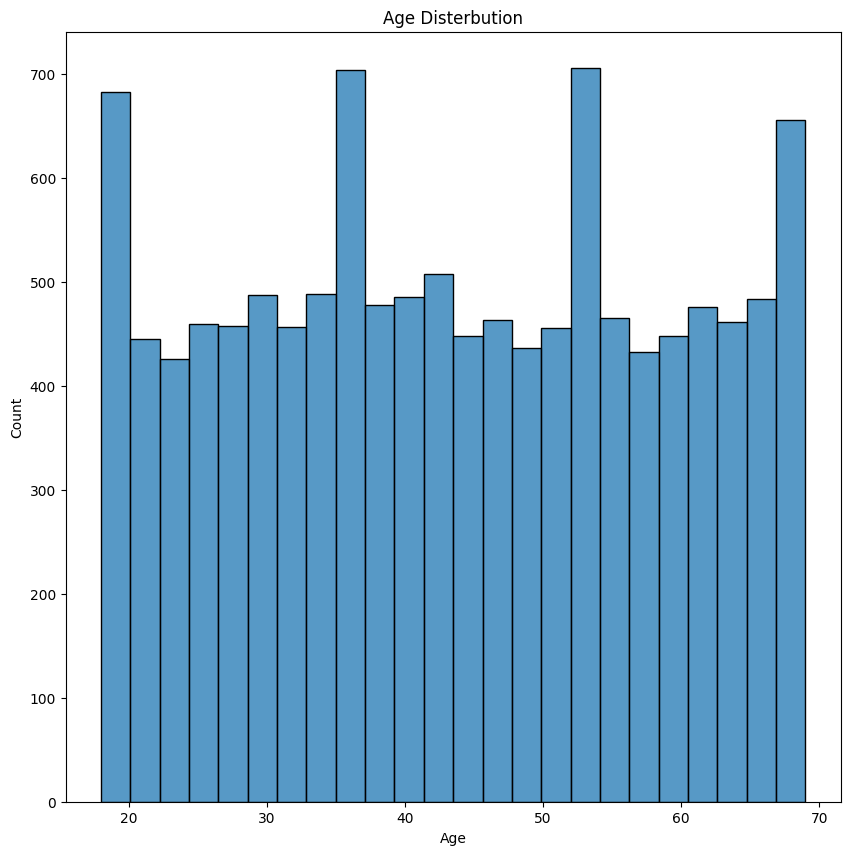

In [141]:
plt.figure(figsize=(10,10))
sns.histplot(df['Age'])
plt.title('Age Disterbution')
plt.show()

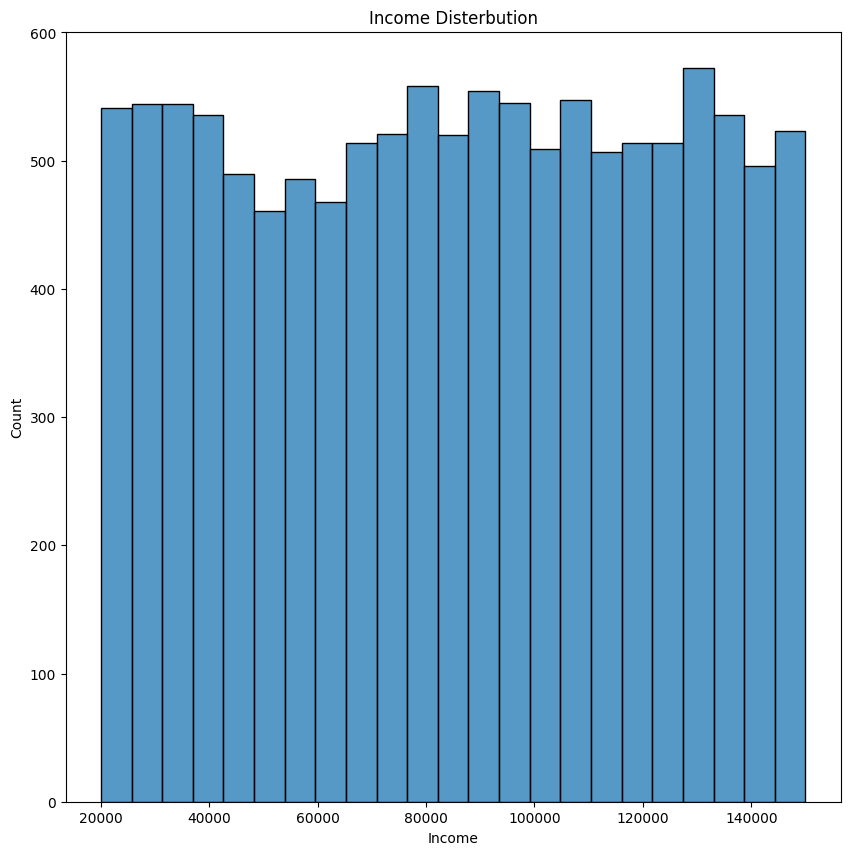

In [142]:
plt.figure(figsize=(10,10))
sns.histplot(df['Income'])
plt.title('Income Disterbution')
plt.show()

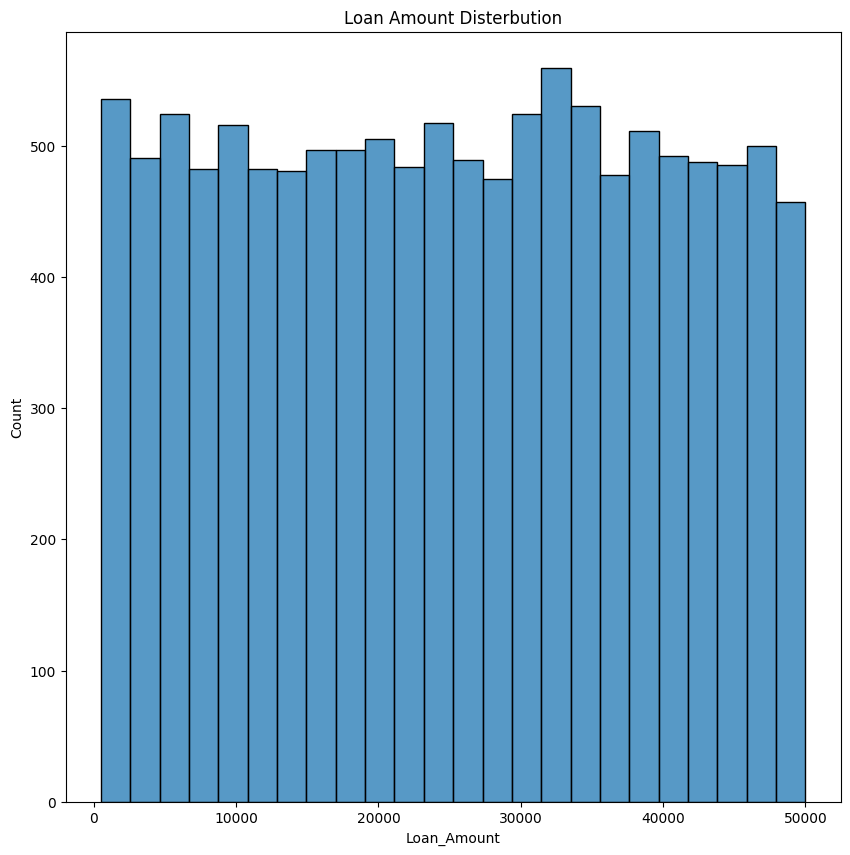

In [143]:
plt.figure(figsize=(10,10))
sns.histplot(df['Loan_Amount'])
plt.title('Loan Amount Disterbution')
plt.show()

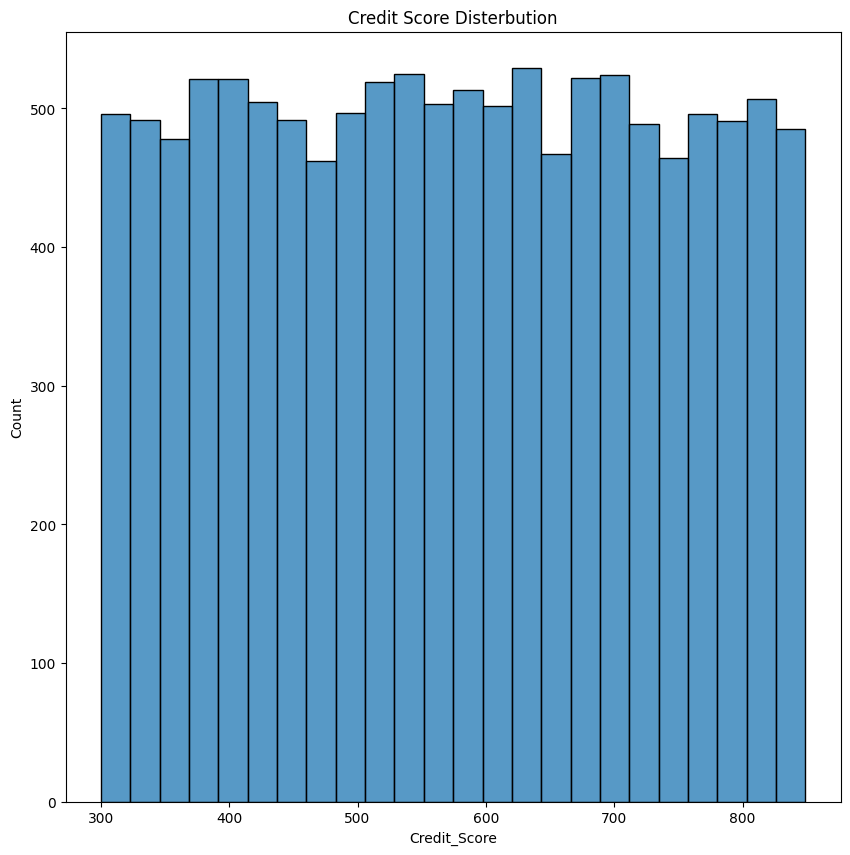

In [144]:
plt.figure(figsize=(10,10))
sns.histplot(df['Credit_Score'])
plt.title('Credit Score Disterbution')
plt.show()

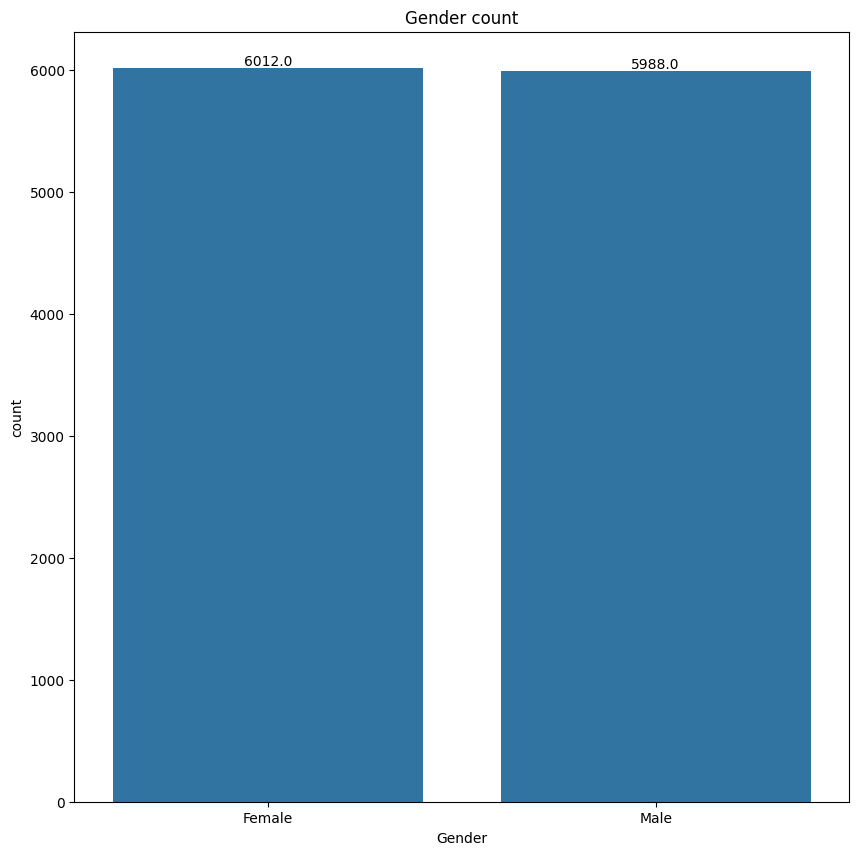

In [145]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x='Gender', data=df)
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,5), textcoords='offset points')
plt.title('Gender count')
plt.show()

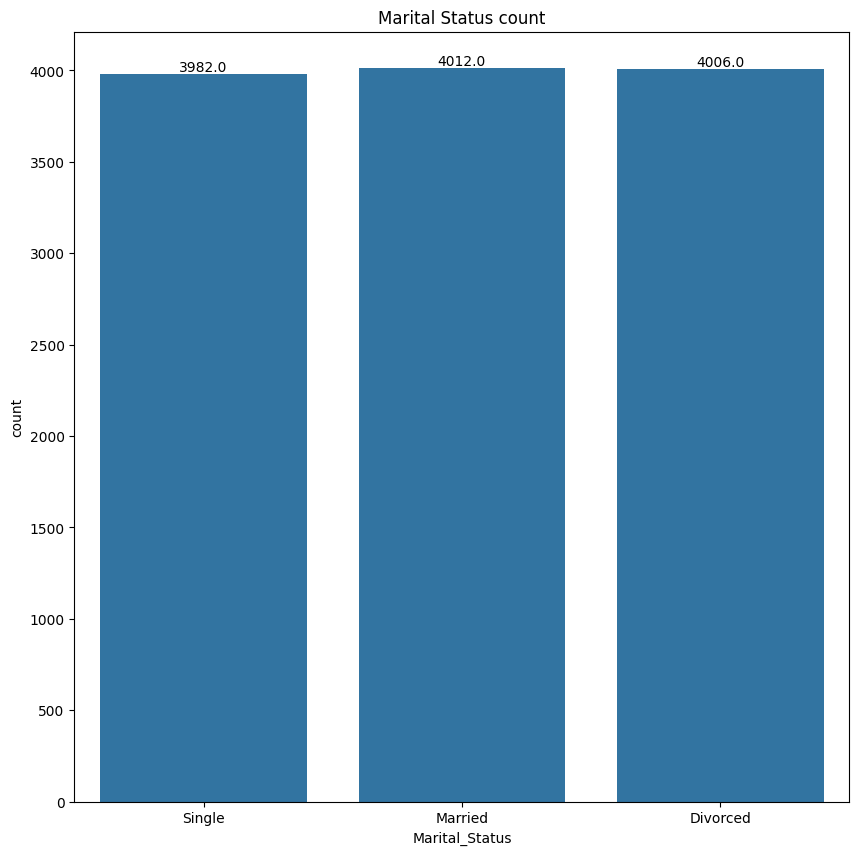

In [146]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x='Marital_Status', data=df)
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,5), textcoords='offset points')
plt.title('Marital Status count')
plt.show()

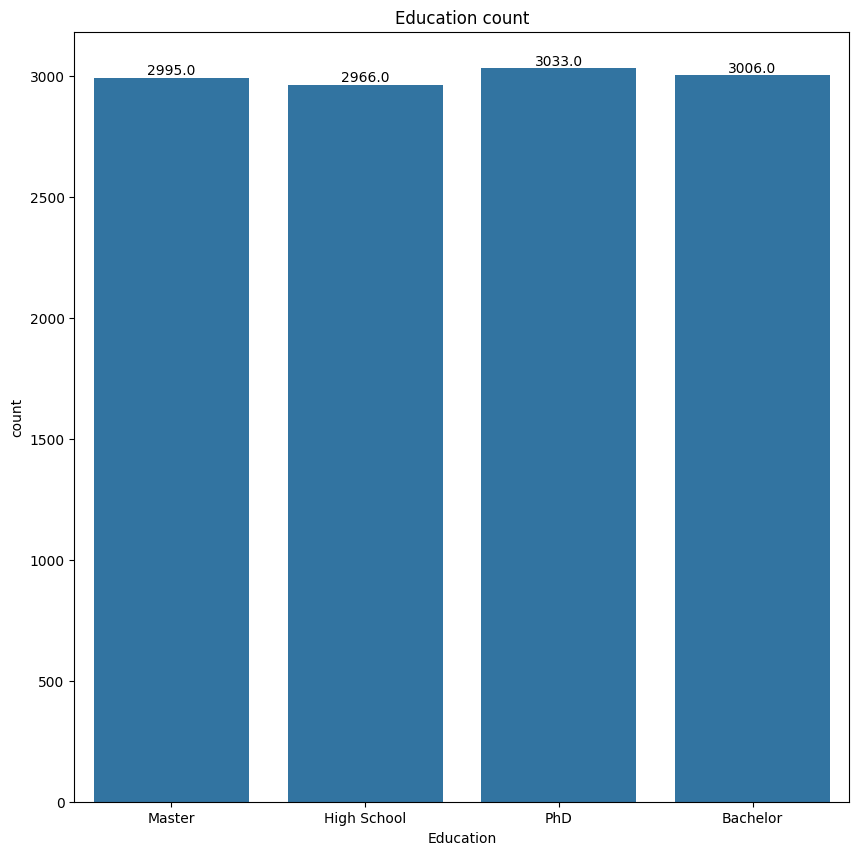

In [147]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x='Education', data=df)
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,5), textcoords='offset points')
plt.title('Education count')
plt.show()

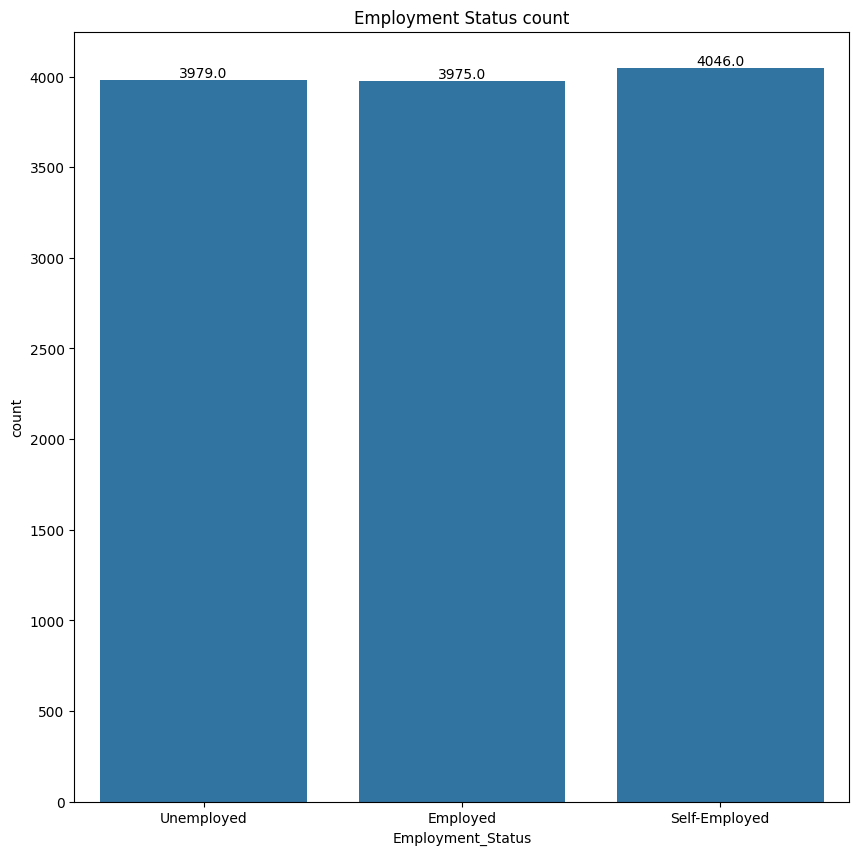

In [148]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x='Employment_Status', data=df)
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,5), textcoords='offset points')
plt.title('Employment Status count')
plt.show()

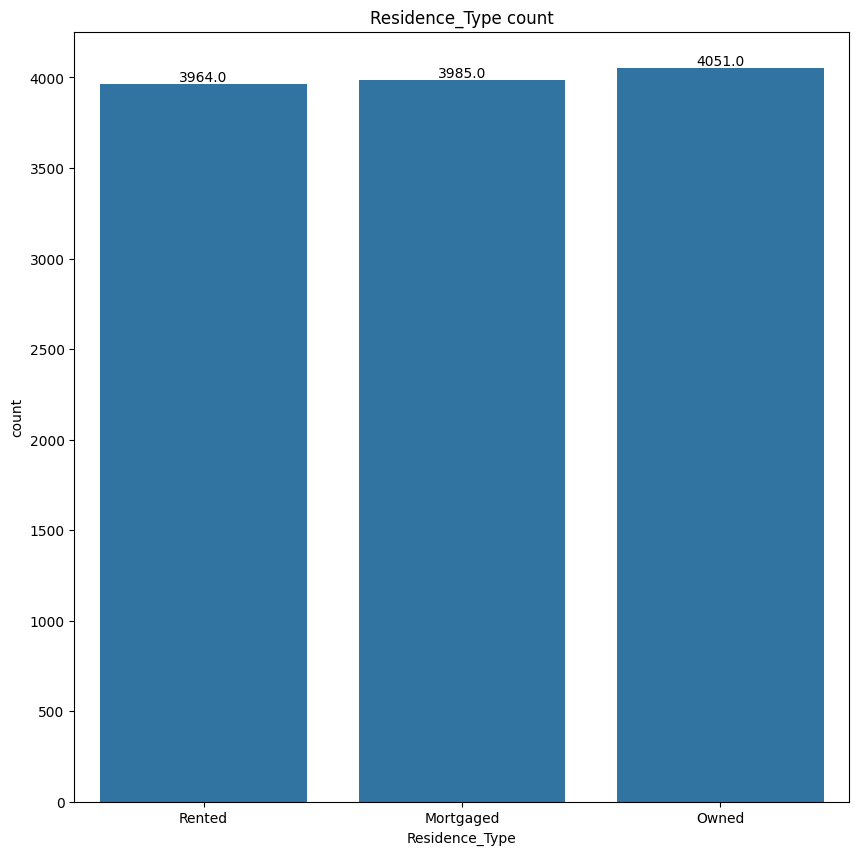

In [149]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x='Residence_Type', data=df)
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,5),textcoords='offset points')
plt.title('Residence_Type count')
plt.show()

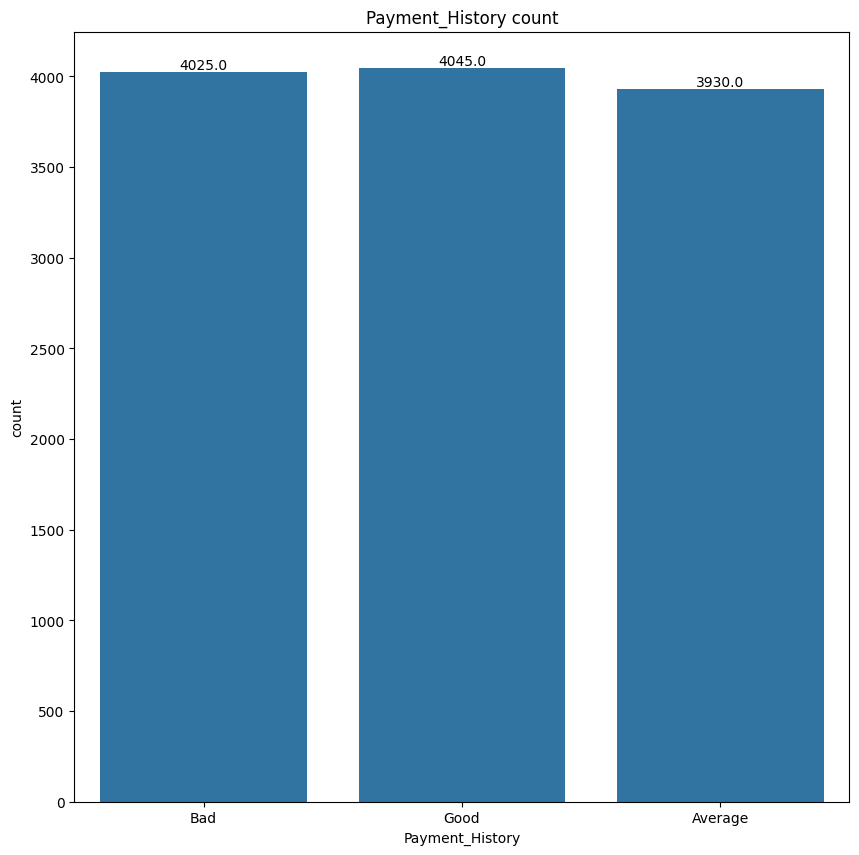

In [150]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x='Payment_History', data=df)
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,5),textcoords='offset points')
plt.title('Payment_History count')
plt.show()

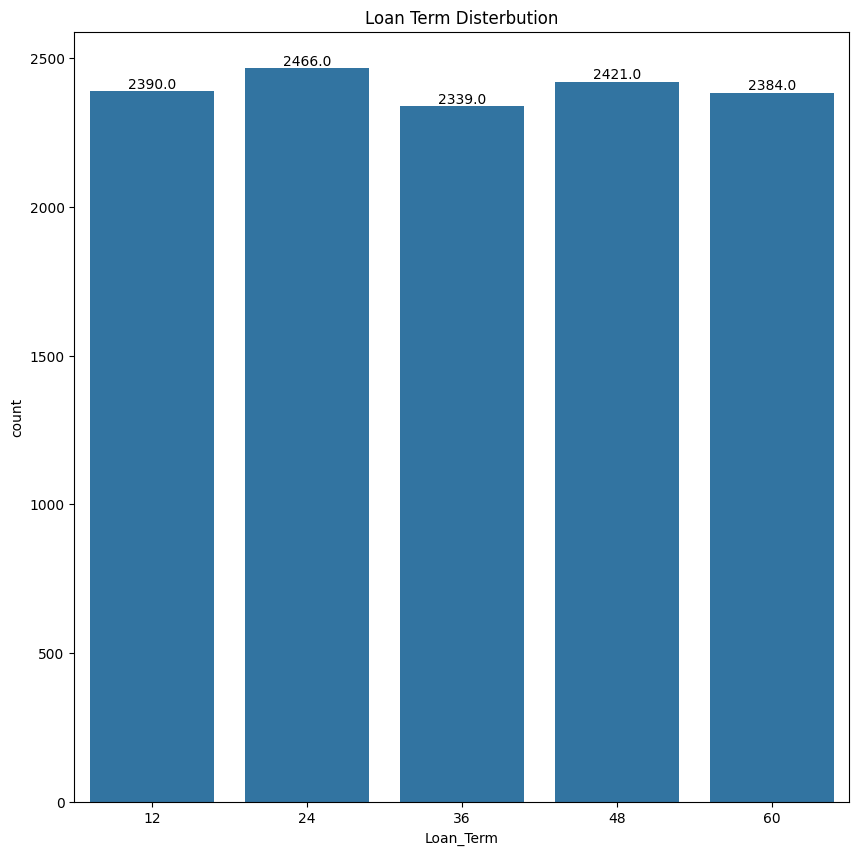

In [151]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x=df['Loan_Term'], data=df)
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,5),textcoords='offset points')
plt.title('Loan Term Disterbution')
plt.show()

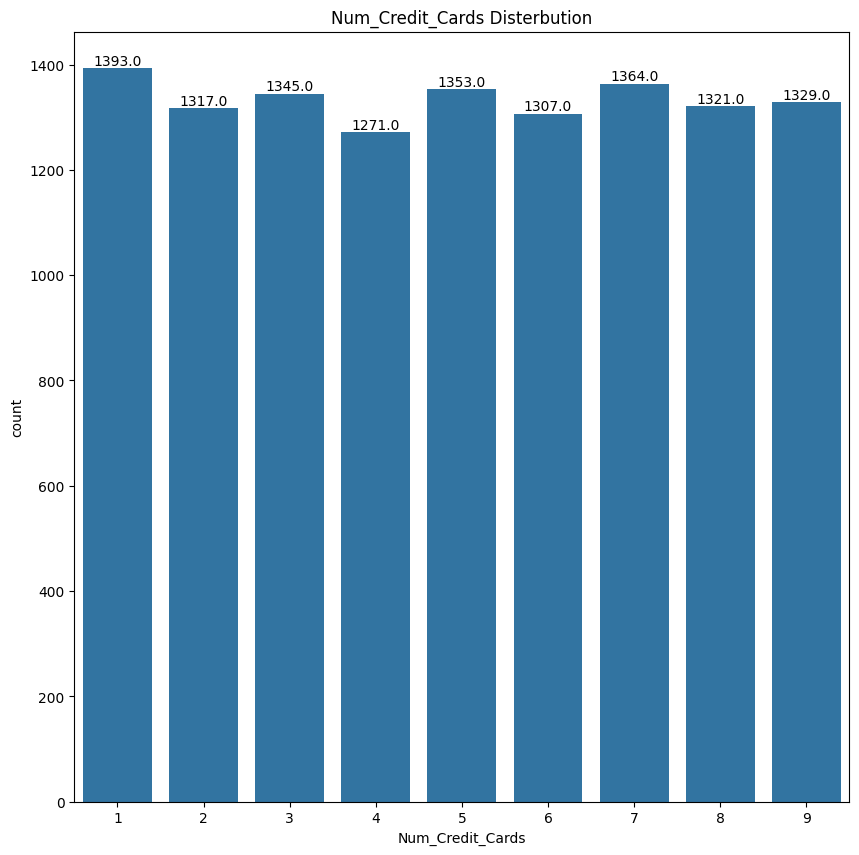

In [152]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x=df['Num_Credit_Cards'], data=df)
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,5),textcoords='offset points')
plt.title('Num_Credit_Cards Disterbution')
plt.show()

In [153]:
lb=LabelEncoder()
df['Gender']=lb.fit_transform(df['Gender'])
df['Marital_Status']=lb.fit_transform(df['Marital_Status'])
df['Education']=lb.fit_transform(df['Education'])
df['Employment_Status']=lb.fit_transform(df['Employment_Status'])
df['Residence_Type']=lb.fit_transform(df['Residence_Type'])
df['Payment_History']=lb.fit_transform(df['Payment_History'])

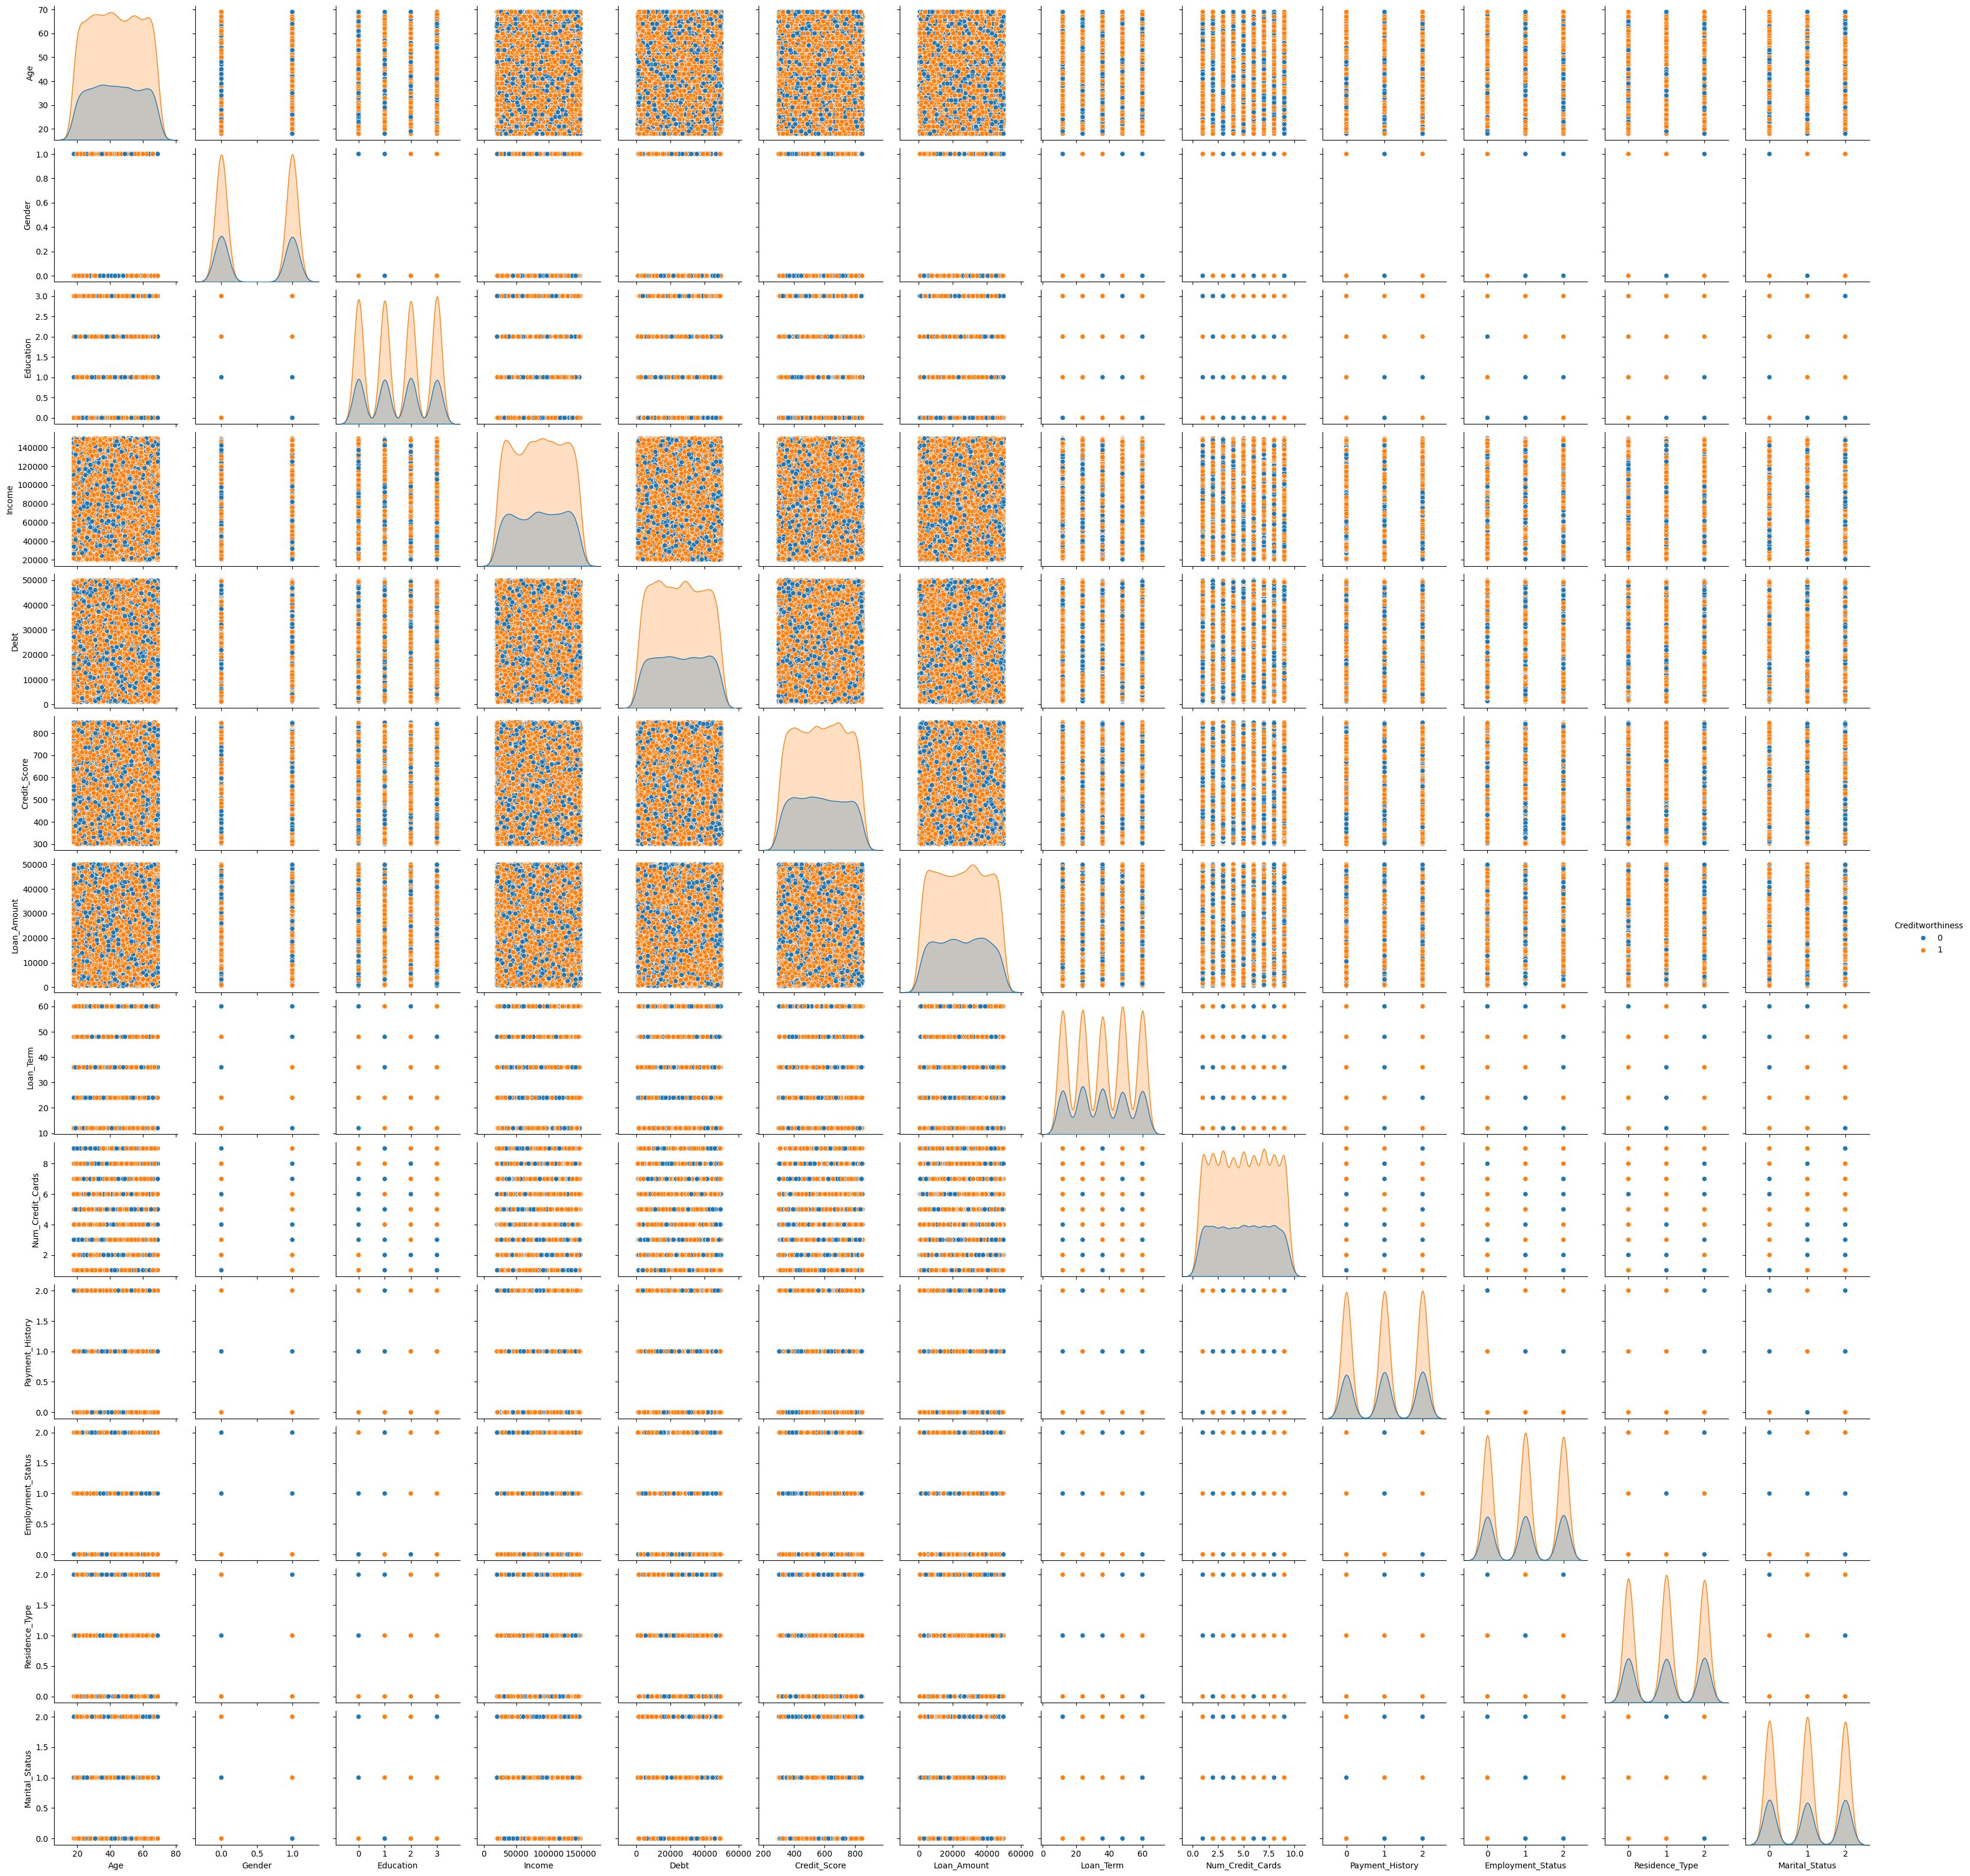

In [245]:
sns.pairplot(df, hue='Creditworthiness')
plt.show()

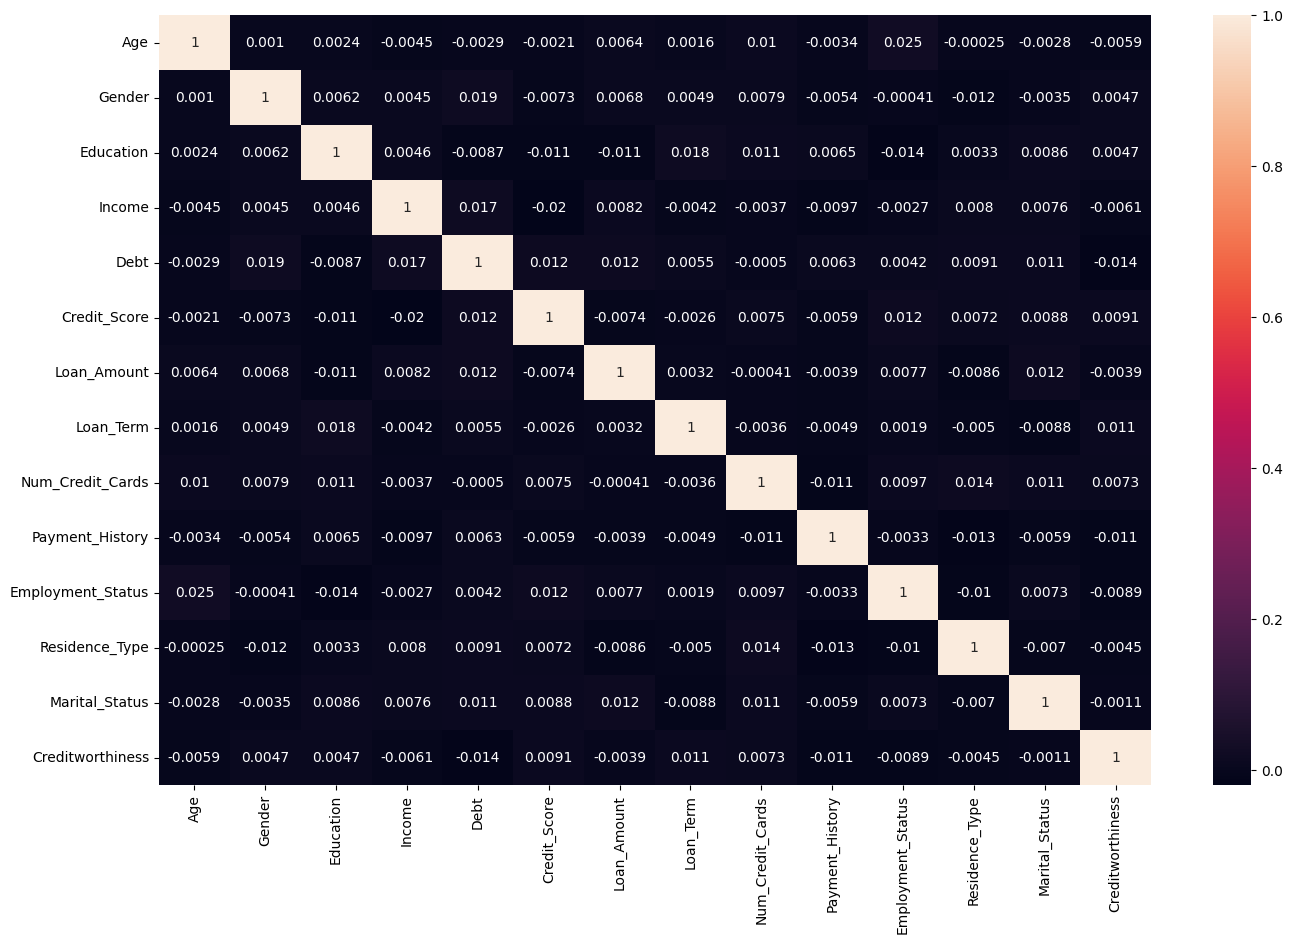

In [154]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [155]:
X=df.drop('Creditworthiness', axis=1)
y=df['Creditworthiness']

In [217]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [218]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape)
print("Training set shape after SMOTE:", X_train_smote.shape)
print("Class distribution after SMOTE:\n", y_train_smote.value_counts())

Original training set shape: (9600, 13)
Training set shape after SMOTE: (13490, 13)
Class distribution after SMOTE:
 Creditworthiness
1    6745
0    6745
Name: count, dtype: int64


In [219]:
log_reg = LogisticRegression(max_iter=1000)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train_smote, y_train_smote)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best Logistic Regression Score:", grid_lr.best_score_)

Best Logistic Regression Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Regression Score: 0.6172899354551481


In [220]:
grid_lr.score(X_train_smote, y_train_smote)

0.6167787196726103

In [221]:
y_pred_log=grid_lr.predict(X_test)

In [222]:
print(f'accuracy score: {accuracy_score(y_test, y_pred_log)}')

accuracy score: 0.5433333333333333


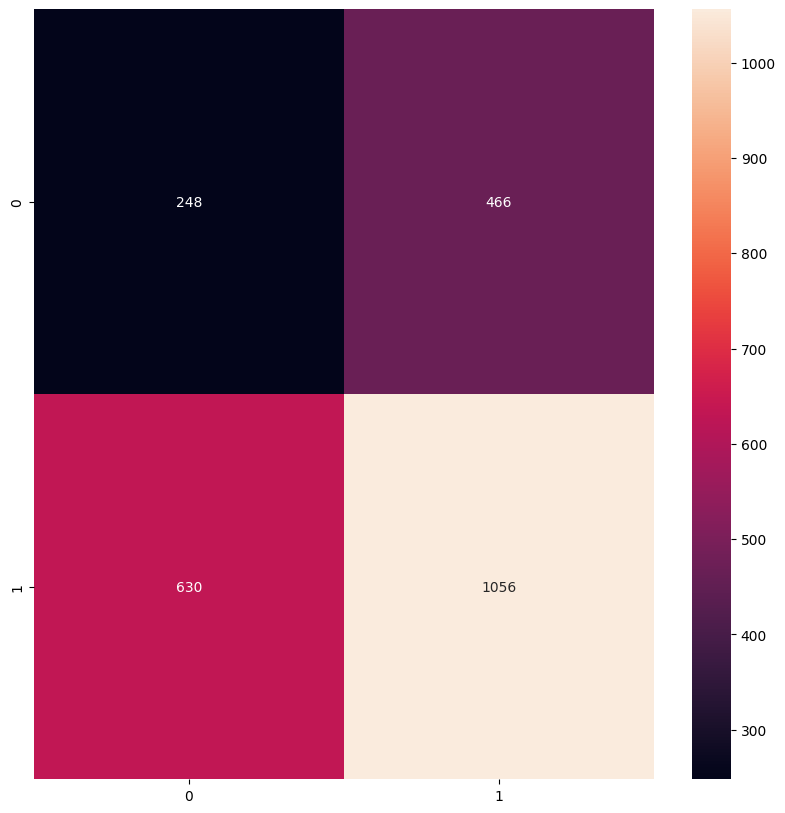

In [223]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred_log),fmt="d", annot=True)
plt.show()

In [224]:
print(f'classification report:\n {classification_report(y_test, y_pred_log)}')

classification report:
               precision    recall  f1-score   support

           0       0.28      0.35      0.31       714
           1       0.69      0.63      0.66      1686

    accuracy                           0.54      2400
   macro avg       0.49      0.49      0.48      2400
weighted avg       0.57      0.54      0.56      2400



In [227]:
dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)
grid_dt.fit(X_train_smote, y_train_smote)

print("Best Decision Tree Params:", grid_dt.best_params_)
print("Best Decision Tree Score:", grid_dt.best_score_)

Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree Score: 0.6542083790806942


In [228]:
grid_dt.score(X_train_smote, y_train_smote)

1.0

In [229]:
y_pred_ds=grid_dt.predict(X_test)

In [230]:
print(f'accuracy score: {accuracy_score(y_test, y_pred_ds)}')

accuracy score: 0.5708333333333333


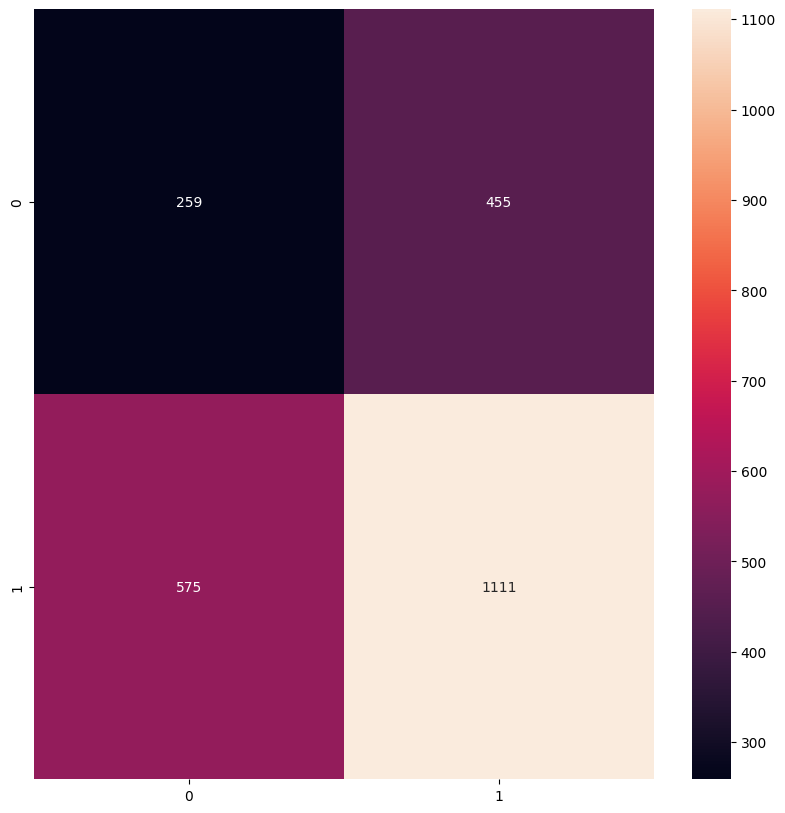

In [231]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred_ds),fmt="d", annot=True)
plt.show()

In [232]:
print(f'classification report:\n {classification_report(y_test, y_pred_ds)}')

classification report:
               precision    recall  f1-score   support

           0       0.31      0.36      0.33       714
           1       0.71      0.66      0.68      1686

    accuracy                           0.57      2400
   macro avg       0.51      0.51      0.51      2400
weighted avg       0.59      0.57      0.58      2400



In [233]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train_smote, y_train_smote)

print("Best Random Forest Params:", grid_rf.best_params_)
print("Best Random Forest Score:", grid_rf.best_score_)

Best Random Forest Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Score: 0.771826172108174


In [234]:
grid_rf.score(X_train_smote, y_train_smote)

0.9996292176492398

In [235]:
y_pred_rf=grid_rf.predict(X_test)

In [236]:
print(f'accuracy score: {accuracy_score(y_test, y_pred_rf)}')

accuracy score: 0.635


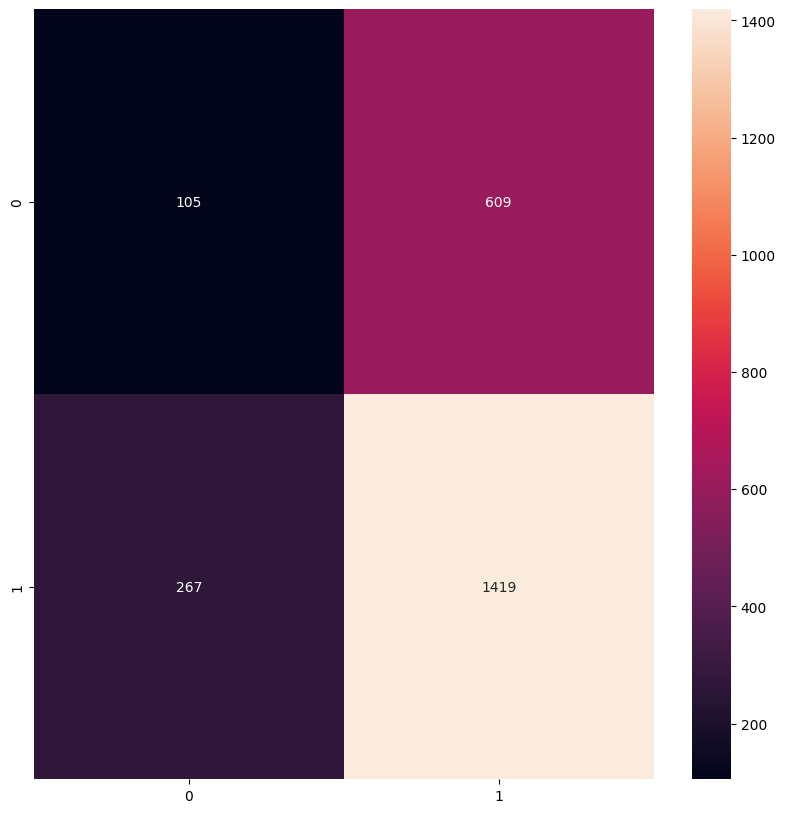

In [237]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),fmt="d", annot=True)
plt.show()

In [238]:
print(f'classification report:\n {classification_report(y_test, y_pred_rf)}')

classification report:
               precision    recall  f1-score   support

           0       0.28      0.15      0.19       714
           1       0.70      0.84      0.76      1686

    accuracy                           0.64      2400
   macro avg       0.49      0.49      0.48      2400
weighted avg       0.58      0.64      0.59      2400



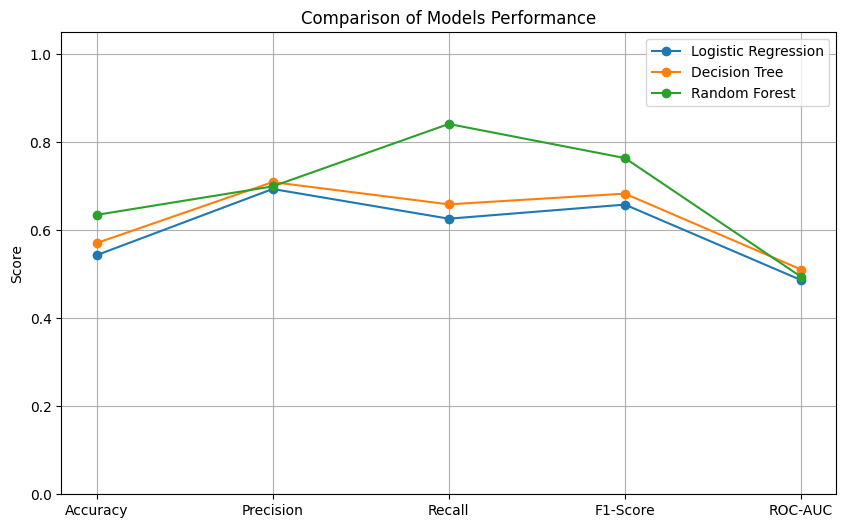

In [239]:
models = {
    "Logistic Regression": grid_lr.best_estimator_,
    "Decision Tree": grid_dt.best_estimator_,
    "Random Forest": grid_rf.best_estimator_
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred)
    }

metrics = list(next(iter(results.values())).keys())
x = range(len(metrics))

plt.figure(figsize=(10,6))

for name, scores in results.items():
    plt.plot(x, list(scores.values()), marker='o', label=name)

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title("Comparison of Models Performance")
plt.legend()
plt.grid(True)
plt.show()